# Таблица 'Нарушения ПДД', запросы корректировки

В этом уроке на каждом шаге используется таблица,  в которой представлена информация о начисленных водителям штрафах за нарушения правил дорожного движения (ПДД).

В таблице `fine` представлена информация о начисленных водителям штрафах за нарушения правил дорожного движения (ПДД) (фамилия водителя, номер машины, описание нарушения, сумма штрафа, дата совершения нарушения и дата оплаты штрафа):

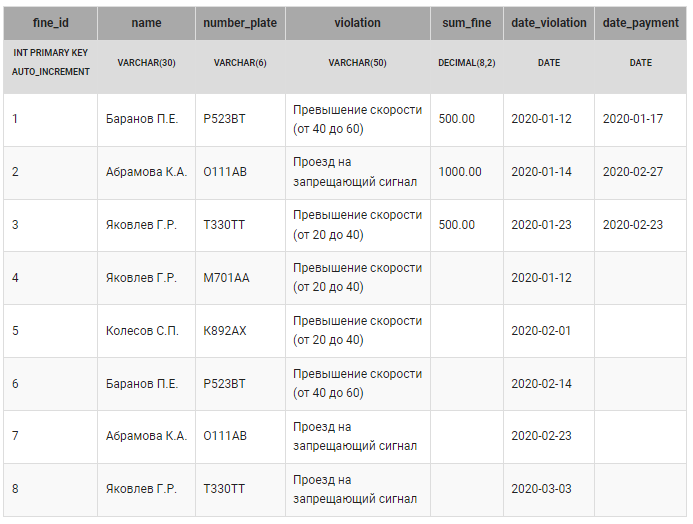

В таблицу `traffic_violation` занесены нарушения ПДД и соответствующие штрафы (в рублях): 

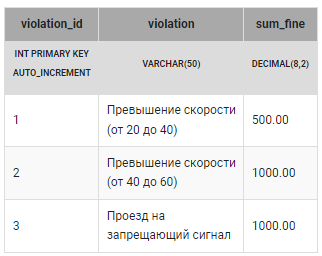

### 48

Создать таблицу fine следующей структуры:

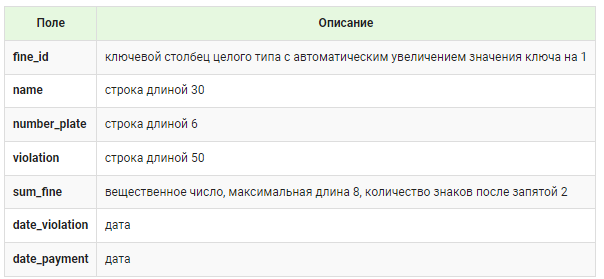

In [ ]:
CREATE TABLE fine(fine_id INT PRIMARY KEY AUTO_INCREMENT,
                  name VARCHAR(30),
                  number_plate VARCHAR(6),
                  violation VARCHAR(50),
                  sum_fine DECIMAL(8,2),
                  date_violation DATE,
                  date_payment DATE);

### 49

В таблицу `fine` первые 5 строк уже занесены. Добавить в таблицу записи с ключевыми значениями 6, 7, 8.

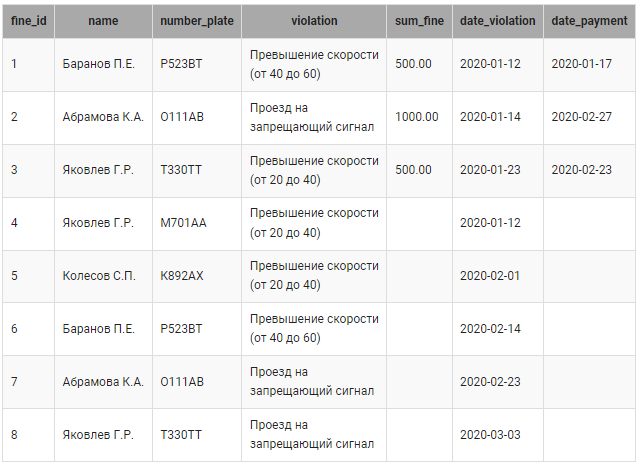

In [ ]:
INSERT INTO fine(name, number_plate, violation, date_violation)
VALUES ('Баранов П.Е.', 'Р523ВТ', 'Превышение скорости(от 40 до 60)', '2020-02-14'),
       ('Абрамова К.А.', 'О111АВ', 'Проезд на запрещающий сигнал', '2020-02-23'),
       ('Яковлев Г.Р.', 'Т330ТТ', 'Проезд на запрещающий сигнал', '2020-03-03')

### 50 Использование временного имени таблицы (алиаса)

Занести в таблицу `fine` суммы штрафов, которые должен оплатить водитель, в соответствии с данными из таблицы `traffic_violation`. При этом суммы заносить только в пустые поля столбца  sum_fine.

Таблица `traffic_violationсоздана` и заполнена.

Важно! Сравнение значения столбца с пустым значением осуществляется с помощью оператора IS NULL.

+---------------+--------+------------------------------+----------+----------------+--------------+
| name          | number | violation                    | sum_fine | date_violation | date_payment | 
|               | _plate |                              |          |                |              | 
+---------------+--------+------------------------------+----------+----------------+--------------+
| Баранов П.Е.  | Р523ВТ | Превышение скорости(от 40... | 500.00   | 2020-01-12     | 2020-01-17   |
| Абрамова К.А. | О111АВ | Проезд на запрещающий сигнал | 1000.00  | 2020-01-14     | 2020-02-27   |
| Яковлев Г.Р.  | Т330ТТ | Превышение скорости(от 20... | 500.00   | 2020-01-23     | 2020-02-23   |
| Яковлев Г.Р.  | М701АА | Превышение скорости(от 20... | NULL     | 2020-01-12     | NULL         |
| Колесов С.П.  | К892АХ | Превышение скорости(от 20... | NULL     | 2020-02-01     | NULL         |
| Баранов П.Е.  | Р523ВТ | Превышение скорости(от 40... | NULL     | 2020-02-14     | NULL         |
| Абрамова К.А. | О111АВ | Проезд на запрещающий сигн...| NULL     | 2020-02-23     | NULL         |
| Яковлев Г.Р.  | Т330ТТ | Проезд на запрещающий сигн...| NULL     | 2020-03-03     | NULL         |
+---------------+--------+------------------------------+----------+----------------+--------------+

In [ ]:
UPDATE fine AS f, 
       traffic_violation AS tv
   SET f.sum_fine = tv.sum_fine
 WHERE f.sum_fine IS NULL 
       AND tv.violation = f.violation;

SELECT *
  FROM fine;

### 51 Группировка данных по нескольким столбцам

Вывести фамилию, номер машины и нарушение только для тех водителей, которые на одной машине нарушили одно и то же правило   два и более раз. При этом учитывать все нарушения, независимо от того оплачены они или нет. Информацию отсортировать в алфавитном порядке, сначала по фамилии водителя, потом по номеру машины и, наконец, по нарушению.

In [ ]:
SELECT name, 
       number_plate, 
       violation
  FROM fine
 GROUP BY name, 
          number_plate, 
          violation                    
HAVING COUNT(*) >= 2
 ORDER BY name, number_plate, violation

### 52

В таблице `fine` увеличить в два раза сумму неоплаченных штрафов для отобранных на предыдущем шаге записей. 

In [ ]:
UPDATE fine f,
       (SELECT name, 
               number_plate, 
               violation
          FROM fine
         GROUP BY name, 
                  number_plate, 
                  violation
           HAVING COUNT(*) > 1) query_in
  SET f.sum_fine = f.sum_fine * 2
WHERE (f.name, f.number_plate, f.violation) = 
      (query_in.name, query_in.number_plate, query_in.violation) 
      AND f.date_payment IS Null;

SELECT * 
  FROM fine;

### 53

Водители оплачивают свои штрафы. В таблице `payment` занесены даты их оплаты:

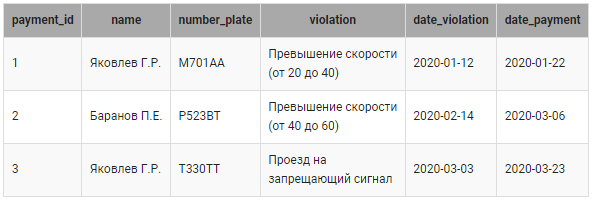

Необходимо:

- в таблицу `fine` занести дату оплаты соответствующего штрафа из таблицы `payment`; 
- уменьшить начисленный штраф в таблице `fine` в два раза  (только для тех штрафов, информация о которых занесена в таблицу `payment`) , если оплата произведена не позднее 20 дней со дня нарушения.

In [ ]:
UPDATE fine AS f,
       payment AS pay
  SET f.date_payment = pay.date_payment,
      f.sum_fine = IF(DATEDIFF(pay.date_payment, pay.date_violation) <= 20, f.sum_fine/2, f.sum_fine)
WHERE (f.name, f.number_plate, f.violation) = (pay.name, pay.number_plate, pay.violation) 
      AND f.date_payment IS Null;
        
SELECT *
  FROM fine;

### 54

Создать новую таблицу `back_payment`, куда внести информацию о неоплаченных штрафах (Фамилию и инициалы водителя, номер машины, нарушение, сумму штрафа  и  дату нарушения) из таблицы `fine`.

__Важно__. На этом шаге необходимо создать таблицу на основе запроса! Не нужно одним запросом создавать таблицу, а вторым в нее добавлять строки.

In [ ]:
CREATE TABLE back_payment AS
SELECT name, 
       number_plate, 
       violation, 
       sum_fine, 
       date_violation
  FROM fine
 WHERE date_payment IS NULL;

SELECT name, 
       number_plate, 
       violation, 
       sum_fine, 
       date_violation
  FROM back_payment;

### 55

Удалить из таблицы `fine` информацию о нарушениях, совершенных раньше 1 февраля 2020 года. 

In [ ]:
DELETE FROM fine
WHERE DATEDIFF(date_violation,  '2020.02.01') < 0;

SELECT *
FROM fine;